<a href="https://colab.research.google.com/github/PritishRane/Deep-Learning/blob/main/Health_insurance_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


separate x and y

In [5]:
x=df.drop(columns=['charges'])
y=df[['charges']]

In [6]:
x.shape

(1338, 6)

In [7]:
y.shape

(1338, 1)

cat and con separation

In [8]:
cat=list(x.columns[x.dtypes=='object'])
con=list(x.columns[x.dtypes!='object'])

In [9]:
cat

['sex', 'smoker', 'region']

In [10]:
con

['age', 'bmi', 'children']

preprocessing pipeline on x

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [13]:
num_pipe=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())])
cat_pipe=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder())])
pre=ColumnTransformer(transformers=[
    ('num_pipe',num_pipe,con),
    ('cat_pipe',cat_pipe,cat)])

In [14]:
x_pre=pre.fit_transform(x)
x_pre

array([[-1.43876426, -0.45332   , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.        ,
         0.        ,  0.        ]])

In [16]:
cols=pre.get_feature_names_out()
cols

array(['num_pipe__age', 'num_pipe__bmi', 'num_pipe__children',
       'cat_pipe__sex_female', 'cat_pipe__sex_male',
       'cat_pipe__smoker_no', 'cat_pipe__smoker_yes',
       'cat_pipe__region_northeast', 'cat_pipe__region_northwest',
       'cat_pipe__region_southeast', 'cat_pipe__region_southwest'],
      dtype=object)

In [17]:
x_pre=pd.DataFrame(x_pre, columns=cols)
x_pre

,num_pipe__age,num_pipe__bmi,num_pipe__children,cat_pipe__sex_female,cat_pipe__sex_male,cat_pipe__smoker_no,cat_pipe__smoker_yes,cat_pipe__region_northeast,cat_pipe__region_northwest,cat_pipe__region_southeast,cat_pipe__region_southwest
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,-1.509965,0.206139,-0.908614,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,-1.509965,1.014878,-0.908614,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,-0.908614,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


train and test split

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [20]:
xtrain.head()

,num_pipe__age,num_pipe__bmi,num_pipe__children,cat_pipe__sex_female,cat_pipe__sex_male,cat_pipe__smoker_no,cat_pipe__smoker_yes,cat_pipe__region_northeast,cat_pipe__region_northwest,cat_pipe__region_southeast,cat_pipe__region_southwest
560,0.483668,-1.757474,0.751079,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,0.554869,-1.040599,-0.908614,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,0.910875,-0.952015,-0.908614,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,-0.014740,0.599846,3.240619,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,1.053277,-1.508126,1.580926,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [21]:
ytrain.head()

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130


In [22]:
xtest.head()

,num_pipe__age,num_pipe__bmi,num_pipe__children,cat_pipe__sex_female,cat_pipe__sex_male,cat_pipe__smoker_no,cat_pipe__smoker_yes,cat_pipe__region_northeast,cat_pipe__region_northwest,cat_pipe__region_southeast,cat_pipe__region_southwest
764,0.412467,-0.900341,0.751079,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
887,-0.228344,-0.105546,-0.908614,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
890,1.765289,-0.619825,-0.908614,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1293,0.483668,-0.806836,1.580926,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
259,-1.438764,0.206139,-0.908614,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [23]:
ytest.head()

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180


build a neural network

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
model=Sequential()

In [28]:
#create hidden layer 1
model.add(Dense(units=64,activation='relu',input_shape=(xtrain.shape[1],)))
#create hidden layer 2
model.add(Dense(units=32,activation='relu'))
#create a output layer
model.add(Dense(units=1,activation='linear'))
#compilinfg the model
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [29]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=100)

Epoch 1/100
27/27 [==============================] - 1s 14ms/step - loss: 325460480.0000 - mean_absolute_error: 13518.2920 - val_loss: 310338144.0000 - val_mean_absolute_error: 12654.4619
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 325412320.0000 - mean_absolute_error: 13516.5938 - val_loss: 310271264.0000 - val_mean_absolute_error: 12652.0107
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 325304672.0000 - mean_absolute_error: 13512.8652 - val_loss: 310121312.0000 - val_mean_absolute_error: 12646.4834
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 325076960.0000 - mean_absolute_error: 13504.7695 - val_loss: 309815040.0000 - val_mean_absolute_error: 12635.2158
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 324638240.0000 - mean_absolute_error: 13489.3291 - val_loss: 309255296.0000 - val_mean_absolute_error: 12614.7734
Epoch 6/100
27/27 [==============================] - 0s 5ms/step

plot the linear curve

In [30]:
hist.history['loss']

[325460480.0,
 325412320.0,
 325304672.0,
 325076960.0,
 324638240.0,
 323883136.0,
 322692320.0,
 320971136.0,
 318592704.0,
 315489696.0,
 311611072.0,
 306954016.0,
 301436032.0,
 295048480.0,
 287892832.0,
 279909600.0,
 271246464.0,
 261810560.0,
 252171328.0,
 241902640.0,
 231373552.0,
 220978432.0,
 210558912.0,
 200213744.0,
 190419824.0,
 181104176.0,
 172411040.0,
 164386544.0,
 157223552.0,
 150876720.0,
 145111888.0,
 140254928.0,
 135743952.0,
 132081304.0,
 128628064.0,
 125635224.0,
 122858256.0,
 120397080.0,
 118150208.0,
 115979792.0,
 113930064.0,
 112033016.0,
 110232328.0,
 108456336.0,
 106755064.0,
 105152904.0,
 103562432.0,
 102016680.0,
 100488256.0,
 99010464.0,
 97550544.0,
 96103328.0,
 94683688.0,
 93277152.0,
 91900168.0,
 90516464.0,
 89167712.0,
 87864016.0,
 86474368.0,
 85194952.0,
 83918128.0,
 82578176.0,
 81317384.0,
 79990016.0,
 78761752.0,
 77489992.0,
 76224504.0,
 75029424.0,
 73785360.0,
 72581112.0,
 71376384.0,
 70182264.0,
 69005064.0,
 6

In [32]:
hist.history['val_loss']

[310338144.0,
 310271264.0,
 310121312.0,
 309815040.0,
 309255296.0,
 308343520.0,
 306959840.0,
 304997088.0,
 302405152.0,
 299134368.0,
 295095712.0,
 290206624.0,
 284565760.0,
 278138528.0,
 270934816.0,
 263046032.0,
 254476256.0,
 245653968.0,
 235971328.0,
 226301360.0,
 216577280.0,
 206498496.0,
 196626560.0,
 187429312.0,
 178575072.0,
 170247696.0,
 162458560.0,
 155516784.0,
 149215744.0,
 143582000.0,
 138900000.0,
 134599840.0,
 131139680.0,
 127694808.0,
 124813184.0,
 122174336.0,
 119867552.0,
 117744008.0,
 115606816.0,
 113652440.0,
 111888776.0,
 110155288.0,
 108400240.0,
 106777600.0,
 105235200.0,
 103705456.0,
 102210448.0,
 100712368.0,
 99303464.0,
 97889568.0,
 96525960.0,
 95132472.0,
 93778168.0,
 92430920.0,
 91064264.0,
 89768600.0,
 88448616.0,
 87133576.0,
 85869704.0,
 84625104.0,
 83246032.0,
 82058832.0,
 80751896.0,
 79542288.0,
 78289568.0,
 77049416.0,
 75847320.0,
 74625240.0,
 73452688.0,
 72246672.0,
 71046112.0,
 69872760.0,
 68697440.0,
 67

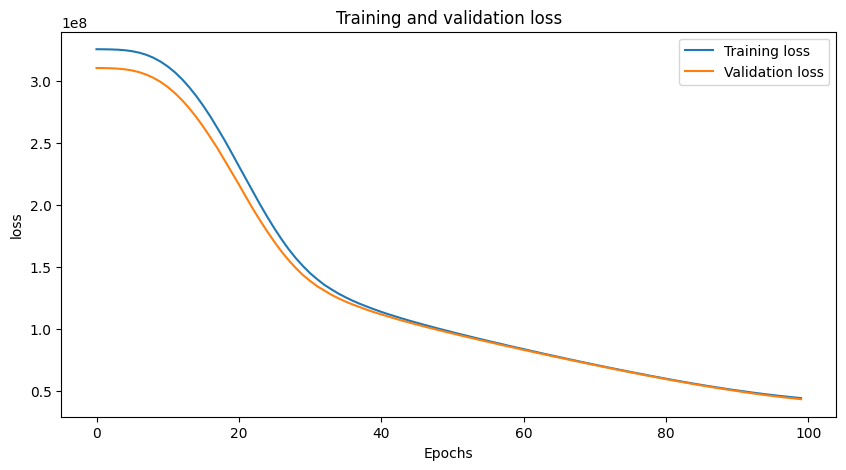

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Training loss')
plt.plot(hist.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

evaluate the model

In [35]:
model.evaluate(xtrain,ytrain)

34/34 [==============================] - 0s 2ms/step - loss: 44011864.0000 - mean_absolute_error: 4968.5303


[44011864.0, 4968.5302734375]

In [36]:
model.evaluate(xtest,ytest)

9/9 [==============================] - 0s 3ms/step - loss: 42390876.0000 - mean_absolute_error: 5016.1060


[42390876.0, 5016.10595703125]

predicting values for train and test

In [37]:
ypred_tr=model.predict(xtrain)
ypred_ts=model.predict(xtest)

9/9 [==============================] - 0s 2ms/step


In [38]:
ypred_tr[0:5]

array([[ 7964.596],
       [ 9456.661],
       [10650.094],
       [12466.65 ],
       [11019.584]], dtype=float32)

In [39]:
ytrain.head()

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130


In [40]:
ypred_ts[0:5]

array([[10005.951],
       [ 8059.653],
       [31707.2  ],
       [11330.428],
       [22433.322]], dtype=float32)

In [41]:
ytest.head()

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180


calculating R2 score

In [43]:
from sklearn.metrics import r2_score

In [47]:
tr_r2=r2_score(ytrain,ypred_tr)
ts_r2=r2_score(ytest,ypred_ts)

In [48]:
tr_r2

0.6950685012838766

In [50]:
ts_r2

0.7269486380319836

saving the neural network model

In [51]:
model.summary()
model.save('insuranceregression.keras')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


load the model

In [52]:
from keras.models import load_model

mn=load_model('insuranceregression.keras')
mn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
